# Uninformed search

## Breadth First Search

https://favtutor.com/blogs/breadth-first-search-python#:~:text=Breadth%2DFirst%20Search%20is%20a,graph%20is%20almost%20the%20same.

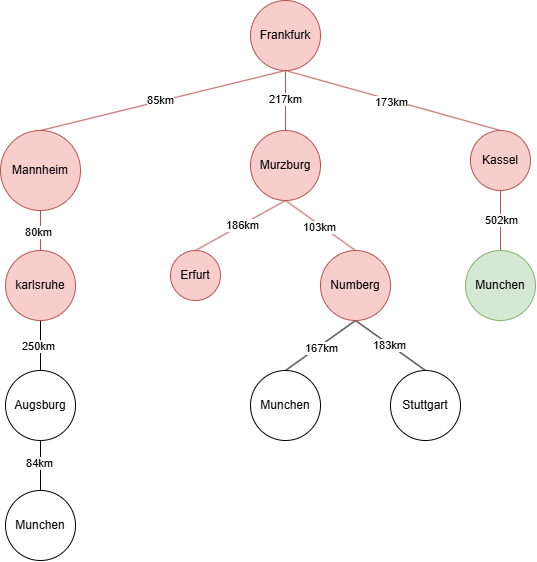

In [32]:
graph = {
    'Frankfurt': ['Mannheim', 'Würzburg', 'Kassel'],
    'Mannheim': ['Karlsruhe'],
    'Würzburg': ['Erfurt', 'Nürnberg'],
    'Stuttgart': [],
    'Kassel': ['München'],
    'Karlsruhe': ['Augsburg'],
    'Erfurt': [],
    'Nürnberg': ['München', 'Stuttgart'],
    'Augsburg': ['München'],
    'München': [],
}

visited = set()  # ใช้ set() แทน list
queue = []  # Initialize a queue

def bfs(visited, graph, node, goal):  # function for BFS
    visited.add(node)
    queue.append(node)

    while queue:  # Creating loop to visit each node
        m = queue.pop(0)
        print(m, end=", ")

        if m == goal:  # หยุดเมื่อถึงเป้าหมาย
            return

        for neighbor in graph[m]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, 'Frankfurt', 'München')


Following is the Breadth-First Search
Frankfurt, Mannheim, Würzburg, Kassel, Karlsruhe, Erfurt, Nürnberg, München, 

## Depth First Search

https://favtutor.com/blogs/depth-first-search-python

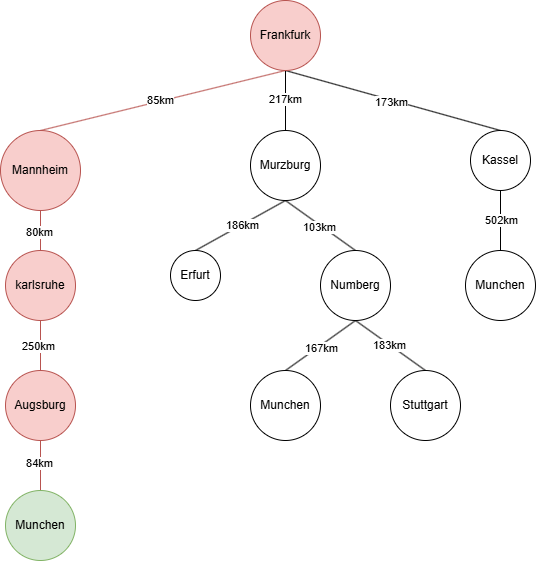

In [33]:
# Using a Python dictionary to act as an adjacency list
graph = {
    'Frankfurt': ['Mannheim', 'Würzburg', 'Kassel'],
    'Mannheim': ['Karlsruhe'],
    'Würzburg': ['Erfurt', 'Nürnberg'],
    'Stuttgart': [],
    'Kassel': ['München'],
    'Karlsruhe': ['Augsburg'],
    'Erfurt': [],
    'Nürnberg': ['München', 'Stuttgart'],
    'Augsburg': ['München'],
    'München': [],
}

visited = set()  # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node, goal):  # Function for DFS
    if node not in visited:
        print(node)
        visited.add(node)

        if node == goal:
            return True

        for neighbour in graph[node]:
            if dfs(visited, graph, neighbour, goal):
                return True
    return False

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, 'Frankfurt', 'München')


Following is the Depth-First Search
Frankfurt
Mannheim
Karlsruhe
Augsburg
München


True

## Uniform Cost Search

https://www.geeksforgeeks.org/uniform-cost-search-ucs-in-ai/

Least cost path from Frankfurt to München: Frankfurt -> Würzburg -> Nürnberg -> München with total cost 487


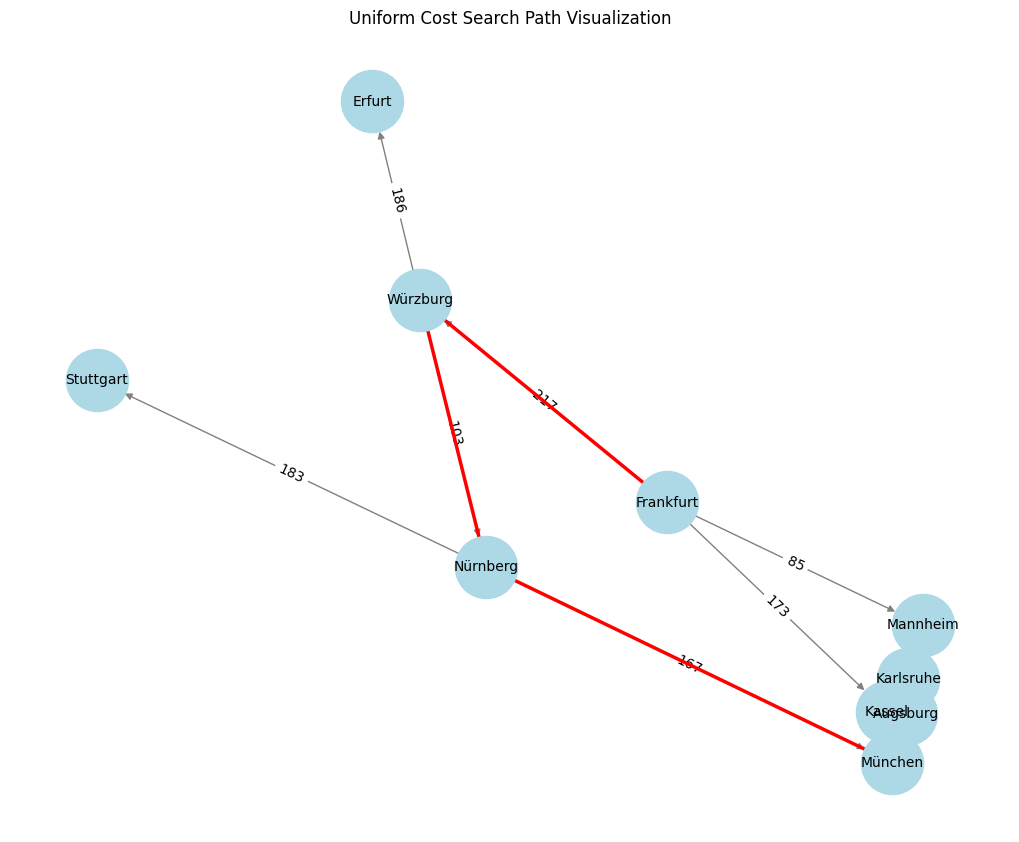

In [34]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]
    visited = {start: (0, None)}

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)

        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))
    return None

def reconstruct_path(visited, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1]
    path.reverse()
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title('Uniform Cost Search Path Visualization')
    plt.show()

graph = {
    'Frankfurt': [('Mannheim', 85), ('Würzburg', 217), ('Kassel', 173)],
    'Mannheim': [('Karlsruhe', 80)],
    'Würzburg': [('Erfurt', 186), ('Nürnberg', 103)],
    'Stuttgart': [],
    'Kassel': [('München', 502)],
    'Karlsruhe': [('Augsburg', 250)],
    'Erfurt': [],
    'Nürnberg': [('München', 167), ('Stuttgart', 183)],
    'Augsburg': [('München', 84)],
    'München': []
}

start_node = 'Frankfurt'
goal_node = 'München'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f'Least cost path from {start_node} to {goal_node}: {" -> ".join(path)} with total cost {total_cost}')
    visualize_graph(graph, path)
else:
    print(f'No path found from {start_node} to {goal_node}')
